# Dogs vs Cats Classification (Transfer Learning with Inception V3)

You can download the Inception V3 weights file from google itself!!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline
from tensorflow import keras
import os

In [2]:
from tensorflow.keras import Model
from tensorflow.keras import layers

from tensorflow.keras.applications import InceptionV3

local_weights_file = '../inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(input_shape=(150,150,3),
                               include_top=False,
                               weights=None)

pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
    layer.trainable = False
    
#pre_trained_model.summary()

last_layer = pre_trained_model.get_layer('mixed7') # taking only till the mixed 7 layer
print('The output shape is  : ',last_layer.output_shape)

last_output = last_layer.output # This is our endpoint layer that we will be using


The output shape is  :  (None, 7, 7, 768)


In [3]:
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [4]:
from tensorflow.keras.optimizers import RMSprop

x = layers.Flatten()(last_output)
x = layers.Dense(1024,activation='relu')(x)
x = layers.Dropout(0.2)(x) # Fraction of input units to drop
x = layers.Dense(1,activation='sigmoid')(x)

model = Model(pre_trained_model.input,x)

model.compile(optimizer=RMSprop(lr=0.001),
                               loss='binary_crossentropy',
                               metrics=['accuracy'])


In [5]:
# Defining the directories for our Dogs-vs-Cats Dataset.

base_dir = '../dogs-vs-cats/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')

featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=0,
    width_shift_range=0.0,
    height_shift_range=0.0,
    brightness_range=None,
    shear_range=0.0,
    zoom_range=0.0,
    channel_shift_range=0.0,
    fill_mode='nearest',
    cval=0.0,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=None,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.0,

In [1]:
# Image Generator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255.0,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   rotation_range=40,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,     
                                   fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(train_dir,
                                  batch_size=20,
                                 target_size=(150,150),
                                 class_mode='binary')

# Note : we will not do data augmentation on the validation set

test_datagen = ImageDataGenerator(rescale=1./255.0)

test_generator = test_datagen.flow_from_directory(validation_dir,
                                batch_size=20,
                                class_mode='binary',
                                target_size=(150,150))





KeyboardInterrupt: 

In [7]:
his = model.fit(train_generator,
               validation_data=test_generator,
               epochs=50,
               steps_per_epoch=100,
               validation_steps=50,
               verbose=1)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 50 steps
Epoch 1/50
100/100 [==============================] - 25s 255ms/step - loss: 1.2387 - accuracy: 0.6860 - val_loss: 0.2614 - val_accuracy: 0.9190
Epoch 2/50
100/100 [==============================] - 11s 115ms/step - loss: 0.5600 - accuracy: 0.7620 - val_loss: 0.3159 - val_accuracy: 0.9350
Epoch 3/50
100/100 [==============================] - 12s 115ms/step - loss: 0.4988 - accuracy: 0.7920 - val_loss: 0.2856 - val_accuracy: 0.9440
Epoch 4/50
100/100 [==============================] - 11s 115ms/step - loss: 0.4622 - accuracy: 0.7920 - val_loss: 0.6996 - val_accuracy: 0.9010
Epoch 5/50
100/100 [==============================] - 12s 116ms/step - loss: 0.4312 - accuracy: 0.8190 - val_loss: 0.2471 - val_accuracy: 0.9540
Epoch 6/50
100/100 [==============================] - 12s 116ms/step - loss: 0.4039 - accuracy: 0.8305 - val_loss: 0.2883 - val_accuracy: 0.9510
Epoch 7/50
100/100 [=================

# Plotting the Accuracy and Losses

Text(0, 0.5, 'Accuracy')

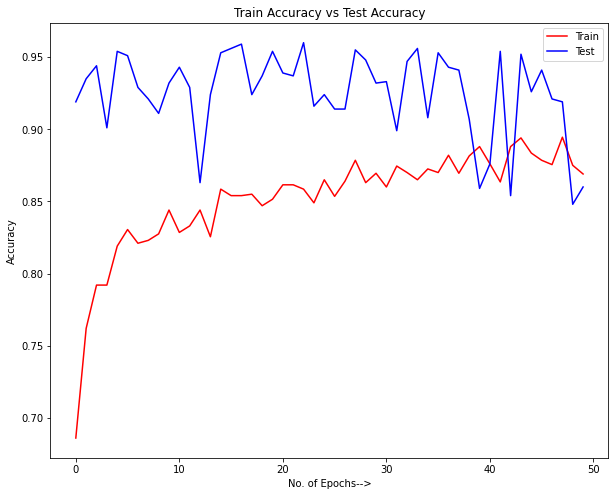

In [9]:
acc = his.history['accuracy']
val_acc = his.history['val_accuracy']
loss = his.history['loss']
val_loss = his.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(10,8))
plt.plot(epochs,acc,'r')
plt.plot(epochs,val_acc,'b')
plt.legend(['Train','Test'],loc='best')
plt.title('Train Accuracy vs Test Accuracy')
plt.xlabel('No. of Epochs-->')
plt.ylabel('Accuracy')


Text(0, 0.5, 'Loss')

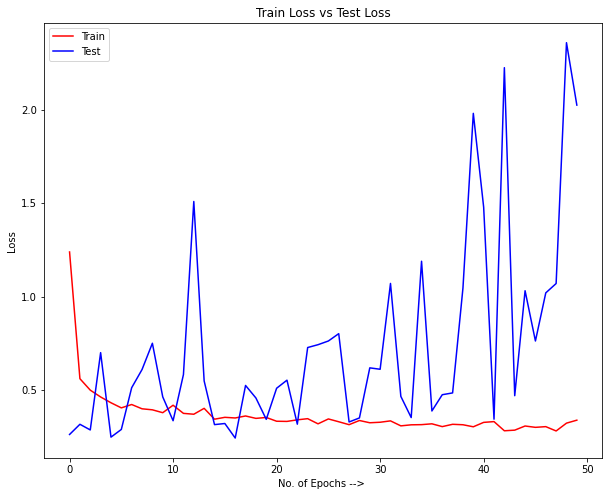

In [10]:
plt.figure(figsize=(10,8))
plt.plot(epochs,loss,'r')
plt.plot(epochs,val_loss,'b')
plt.legend(['Train','Test'],loc='best')
plt.title('Train Loss vs Test Loss')
plt.xlabel('No. of Epochs --> ')
plt.ylabel('Loss')
